## Tugas Praktikum 1 - Logistic Regression & Decision Tree

## Import Library

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import Image, display
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Load Dataset

In [2]:
# Load dataset
data = pd.read_csv('iklan_sosmed.csv', delimiter=';')

## Menampilkan Properti Data

In [3]:
data.head()

,ID,Jenis_Kelamin,Umur,Gaji,Transaksi
0,15624510,Pria,19,285000000,0
1,15810944,Pria,35,300000000,0
2,15668575,Wanita,26,645000000,0
3,15603246,Wanita,27,855000000,0
4,15804002,Pria,19,1140000000,0


In [4]:
data.shape

(400, 5)

In [5]:
data.dtypes

ID                int64
Jenis_Kelamin    object
Umur              int64
Gaji              int64
Transaksi         int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             400 non-null    int64 
 1   Jenis_Kelamin  400 non-null    object
 2   Umur           400 non-null    int64 
 3   Gaji           400 non-null    int64 
 4   Transaksi      400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [7]:
data.describe()

,ID,Umur,Gaji,Transaksi
count,4.000000e+02,400.000000,4.000000e+02,400.000000
mean,1.569154e+07,37.655000,1.046138e+09,0.357500
std,7.165832e+04,10.482877,5.114544e+08,0.479864
min,1.556669e+07,18.000000,2.250000e+08,0.000000
25%,1.562676e+07,29.750000,6.450000e+08,0.000000
50%,1.569434e+07,37.000000,1.050000e+09,0.000000
75%,1.575036e+07,46.000000,1.320000e+09,1.000000
max,1.581524e+07,60.000000,2.250000e+09,1.000000


## Cek Missing Value dan Duplikasi Data

In [8]:
data.isnull().sum()

ID               0
Jenis_Kelamin    0
Umur             0
Gaji             0
Transaksi        0
dtype: int64

In [9]:
data.duplicated().sum()

np.int64(0)

## Preprocessing 

In [10]:
le = LabelEncoder()
data['Jenis_Kelamin'] = le.fit_transform(data['Jenis_Kelamin'])

## Cek Korelasi dengan Kolom Transaksi

In [11]:
data.corr()['Transaksi']

ID               0.007120
Jenis_Kelamin    0.042469
Umur             0.622454
Gaji             0.362083
Transaksi        1.000000
Name: Transaksi, dtype: float64

In [12]:
# Memilih Umur & Gaji Sebagai Data Fitur dan Transaksi sebagai Data Label
X = data.iloc[:, 2:-1]
y = data.iloc[:, -1]

## Train Test Split

In [13]:
# Membagi dataset menjadi 80% Data Training dan 20% Data Testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=99)

In [14]:
# ubah dari dataframe / series pandas menjadi np.array
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [15]:
# Normalisasi dengan MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Buat Classifier dan Lakukan Training

### DecisionTree Classifier

In [16]:
# Buat Klasifier dengan DecisionTree
classifier = DecisionTreeClassifier()

In [17]:
# Melatih model dengan menggunakan data latih
classifier = classifier.fit(X_train, y_train)

In [18]:
# Melakukan prediksi pada X_test
y_pred = classifier.predict(X_test)

In [19]:
y_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [20]:
y_test

array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [21]:
# buat confussion matrix & skor akurasi
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

Akurasi : 81.25%
Confussion Matrix : 
[[49  7]
 [ 8 16]]


### Melakukan Visualisasi Data Train dan Data Test

C:\Users\azkbr\AppData\Local\Temp\ipykernel_13820\535394476.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


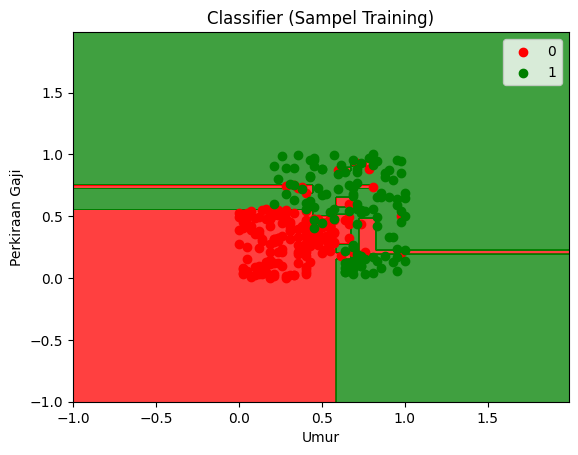

In [22]:
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Classifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

C:\Users\azkbr\AppData\Local\Temp\ipykernel_13820\1140893.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


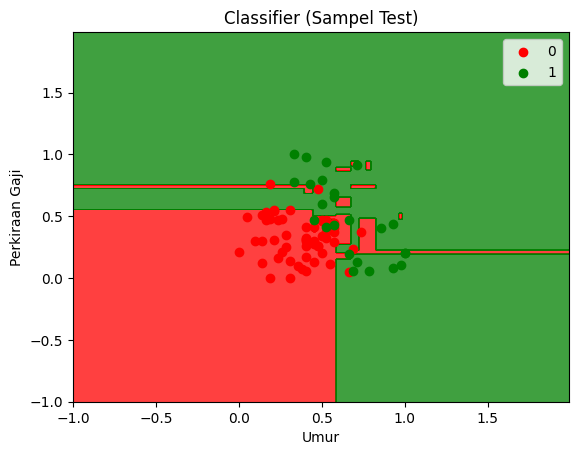

In [23]:
# visualisasi sampel data tes
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Classifier (Sampel Test)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

## Logistic Regression

In [24]:
# Buat Klasifier dengan LinearRegression
classifier = LogisticRegression()

In [25]:
# Melatih model dengan menggunakan data latih
classifier = classifier.fit(X_train, y_train)

In [26]:
# Melakukan prediksi pada X_test
y_pred = classifier.predict(X_test)

In [27]:
# buat confussion matrix & skor akurasi
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

Akurasi : 85.0%
Confussion Matrix : 
[[54  2]
 [10 14]]


### Melakukan Visualisasi Data Train dan Data Test

C:\Users\azkbr\AppData\Local\Temp\ipykernel_13820\535394476.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


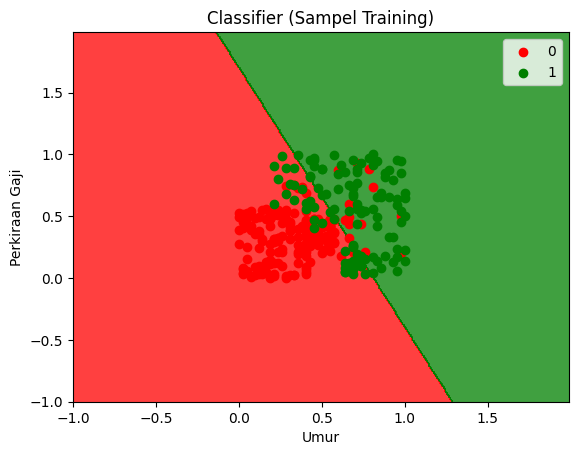

In [28]:
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Classifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

C:\Users\azkbr\AppData\Local\Temp\ipykernel_13820\933350449.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


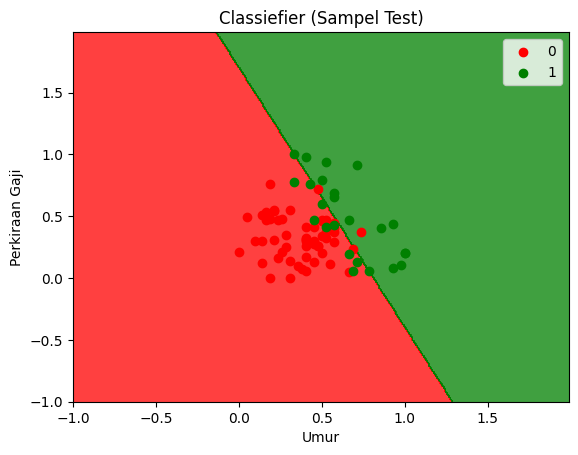

In [29]:
# visualisasi sampel data tes
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('Classiefier (Sampel Test)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

## Membuat Decision Tree

In [30]:
# Membuat model Decision Tree
tree_model = DecisionTreeClassifier()

# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

In [31]:
y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: %.2f%%' % (acc_secore * 100))

Accuracy: 82.50%


In [32]:
export_graphviz(
    tree_model,  
    out_file="iklan_sosmed_tree.dot",
    feature_names=['Umur', 'Perkiraan Gaji'],
    class_names=['Tidak Transaksi', 'Transaksi'],
    rounded=True,
    filled=True
)

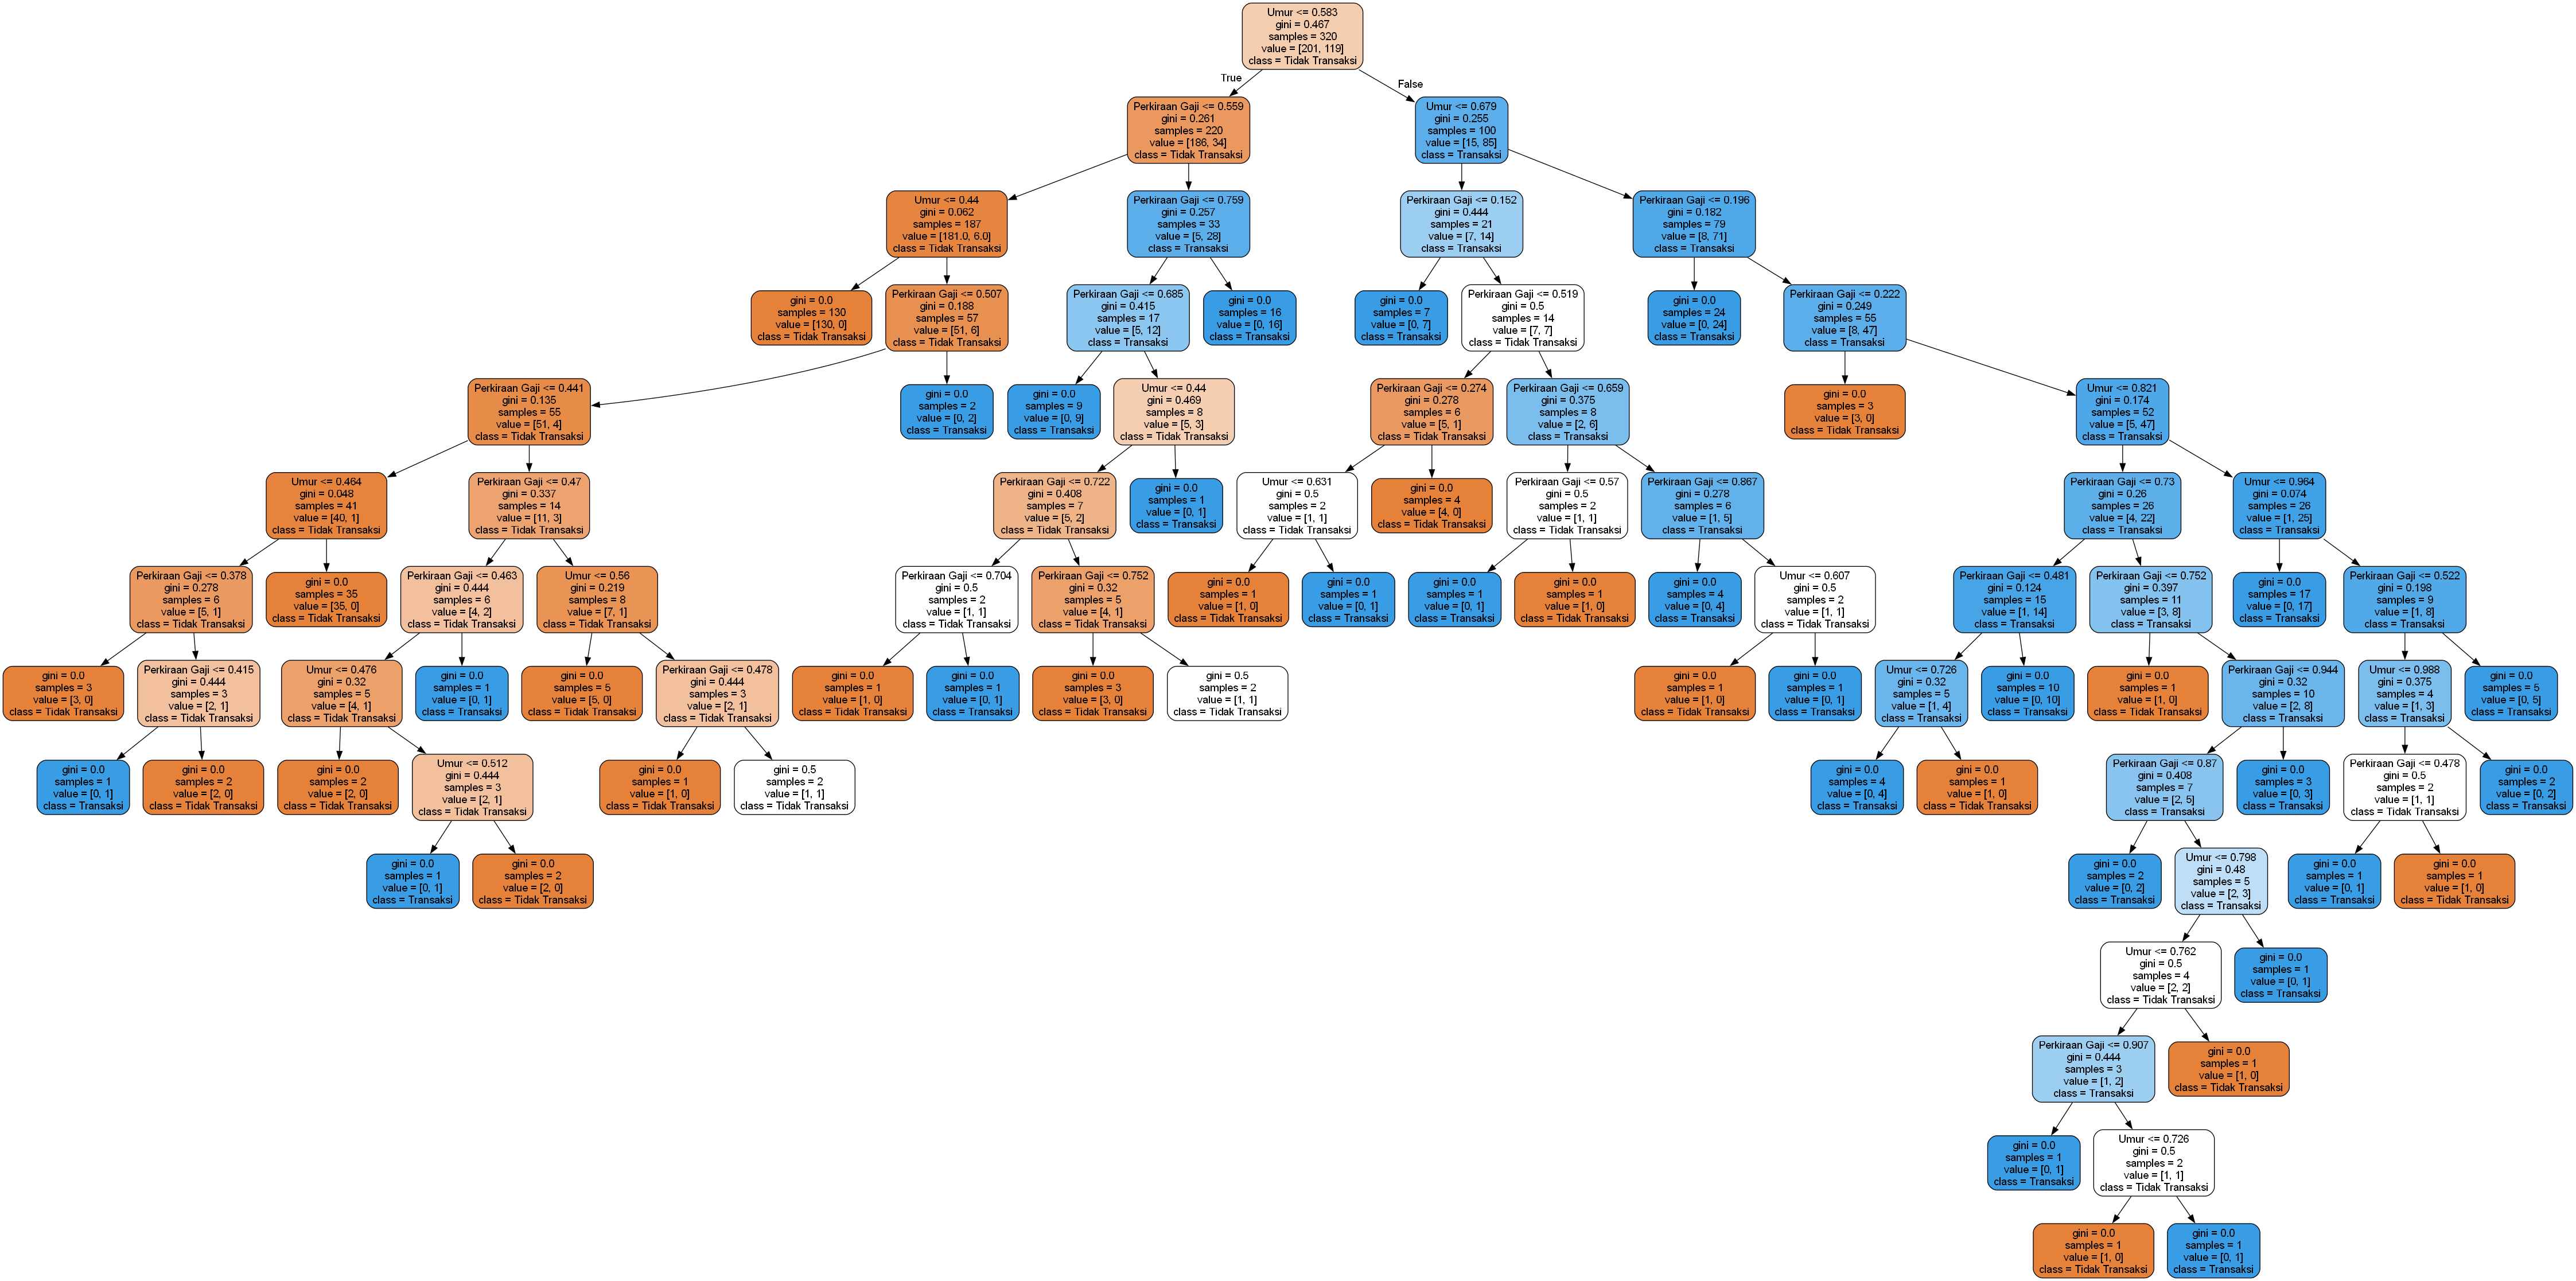

In [33]:
# Render graphviz ke PNG
dot_file = "iklan_sosmed_tree.dot"
graph = Source.from_file(dot_file)
graph.format = 'png'

# view=False agar tidak terbuka window eksternal
graph.render(filename='iklan_sosmed_tree', cleanup=True, view=False)

display(Image(filename='iklan_sosmed_tree.png'))

## Melakukan Tunning

### Decision Tree 

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
param_tree = {
    'max_depth': [3, 5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random']
}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_tree, cv=5)
grid_tree.fit(X_train, y_train)
best_tree = grid_tree.best_estimator_
y_pred = best_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

Akurasi : 86.25%
Confussion Matrix : 
[[50  6]
 [ 5 19]]


C:\Users\azkbr\AppData\Local\Temp\ipykernel_13820\2595412307.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


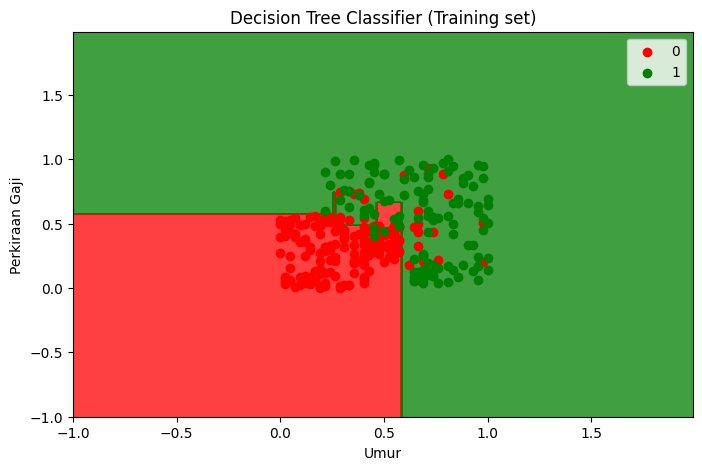

In [35]:
# Visualisasi untuk TRAINING SET
X_set, y_set = X_train, y_train

# Pastikan X_set hanya punya 2 fitur untuk visualisasi
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1,
              stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1,
              stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.figure(figsize=(8, 5))
plt.contourf(X1, X2, best_tree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()
plt.show()

C:\Users\azkbr\AppData\Local\Temp\ipykernel_13820\199842609.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


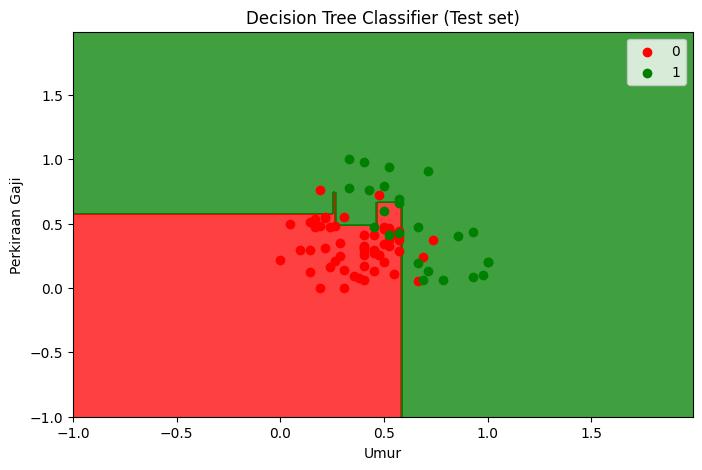

In [36]:
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1,
              stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1,
              stop=X_set[:, 1].max() + 1, step=0.01)
)
plt.figure(figsize=(8, 5))
plt.contourf(X1, X2, best_tree.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Decision Tree Classifier (Test set)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()
plt.show()

### Logistic Regression

In [37]:
# Pipeline untuk preprocessing + klasifikasi
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='saga', max_iter=1000))
])

# Parameter Grid
param_logreg = {
    'logreg__penalty': ['l1', 'l2', 'elasticnet'],
    'logreg__C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
    # Akan diabaikan jika penalty != elasticnet
    'logreg__l1_ratio': [0, 0.1, 0.5, 0.9, 1]
}

# Grid Search
grid = GridSearchCV(pipeline, param_logreg, cv=5,
                    scoring='accuracy', n_jobs=-1, error_score='raise')
grid.fit(X_train, y_train)

# Hasil prediksi
y_pred = grid.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi: {:.2f}%".format(acc * 100))
print("Confusion Matrix:")
print(cm)

Akurasi: 87.50%
Confusion Matrix:
[[52  4]
 [ 6 18]]


c:\Users\azkbr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1213: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


C:\Users\azkbr\AppData\Local\Temp\ipykernel_13820\2541675025.py:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


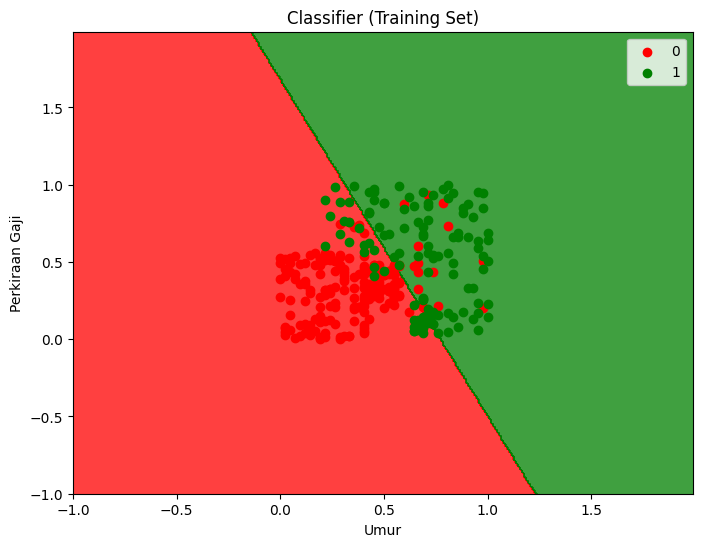

In [38]:
# Ambil model terbaik
best_model = grid.best_estimator_

# Set data training
X_set, y_set = X_train, y_train

# Buat grid
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1,
              stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1,
              stop=X_set[:, 1].max() + 1, step=0.01)
)

# Prediksi untuk setiap titik dalam grid
pred_grid = best_model.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, pred_grid, alpha=0.75,
             cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot titik data
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Classifier (Training Set)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()
plt.show()

C:\Users\azkbr\AppData\Local\Temp\ipykernel_13820\1955997777.py:25: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


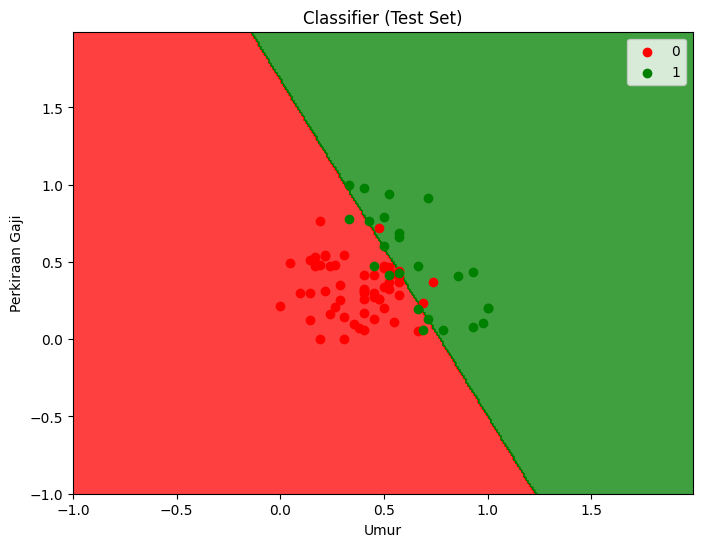

In [39]:
# Set data test
X_set, y_set = X_test, y_test

# Buat grid
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1,
              stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1,
              stop=X_set[:, 1].max() + 1, step=0.01)
)

# Prediksi untuk setiap titik dalam grid
pred_grid = best_model.predict(
    np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, pred_grid, alpha=0.75,
             cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plot titik data
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Classifier (Test Set)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()
plt.show()